# Values to Consider

**Mean**:
The sum of all sample values divided by the total number of elements.

**Median**:
The middle value in the frequency distribution of the sample.

**Mode**:
The most frequent value.

**Standard Deviation**:
A measure of variability around the mean of the distribution.

**It's important to note that everything we have developed so far is built under the assumption of a normal distribution.**

# Normality Test

The normality test can be provided either graphically through a percentile plot or statistically through a statistical test.

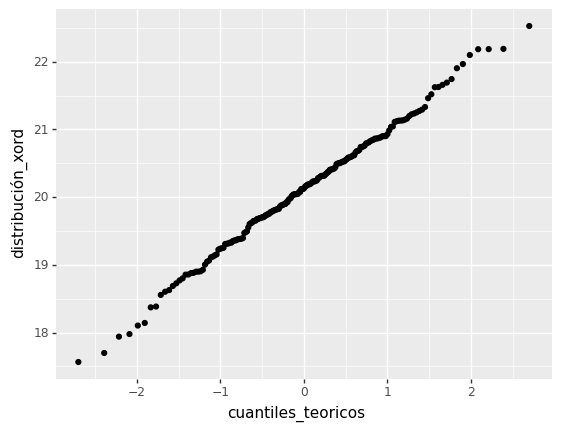

In [21]:
qq-plot
Objectives:
See how the qqplot graph looks when the distribution is normal.
See how the qqplot graph looks when the distribution is not normal.

```python
import numpy as np
import pandas as pd
from scipy import stats
import plotnine as p9

# Simulating a normal distribution
np.random.seed(1)
# Creating the distribution
dist = np.random.normal(loc=20, scale=1, size=200)
# Sorting the values
dist_ord = np.sort(dist, axis=None)
# Creating the theoretical quantiles with respect to the original distribution
theoretical_quantiles = stats.probplot(dist, dist="norm")
data = pd.DataFrame({'sorted_distribution': dist_ord,
                     "theoretical_quantiles": theoretical_quantiles[0][0]})
# Note that we need to select theoretical_quantiles[0][0] to print the variable
plot = p9.ggplot(data) + p9.aes(x="theoretical_quantiles", y='sorted_distribution') + p9.geom_point()
print(plot)



# What a Normal Distribution Guarantees:

**Mean = Mode = Median**

**Symmetry**

**Crucial for many tests (they assume normality)**
- t-test
- F-test
- ANOVA


In [23]:
test_shapiro=stats.shapiro(dist)
print(test_shapiro)


ShapiroResult(statistic=0.9958657026290894, pvalue=0.86690753698349)


# Non-Parametric Tests
When the assumptions of normality do not hold, and sample sizes are small, non-parametric tests are used.

Advantages:
- They have few assumptions.
- They do not have fixed population parameters.
- They are used when data does not fit these distributions.
- They have low sensitivity and less specific hypotheses.

Parametric vs. Non-Parametric Equivalents

- t-test / Wilcoxon Rank Test

**Hypothesis for Wilcoxon Rank Sum Test**

Random sample A > Random sample B
Not sensitive to the shape of the distribution

**Hypothesis for Wilcoxon Signed Rank Sum Test (paired t-test)**
Test for the difference of means

RanksumsResult(statistic=-6.5199316098193325, pvalue=7.033945524801963e-11)
WilcoxonResult(statistic=0.0, pvalue=1.7343976283205784e-06)


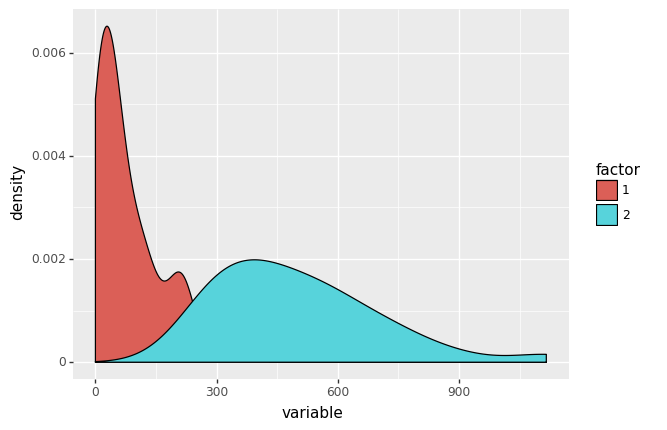

In [34]:
np.random.seed(1)
dist1=np.random.gamma(shape=1,scale=100,size=30)
dist2=np.random.gamma(shape=5,scale=100,size=30)
factor=np.concatenate((np.repeat("1",30),np.repeat("2",30)))
variable=np.concatenate((dist1,dist2))
datos=pd.DataFrame({"variable":variable,"factor":factor})
plot=p9.ggplot(datos)+p9.aes(x='variable',fill="factor")+p9.geom_density(alpha=1)
print(stats.ranksums(dist1,dist2))
print(stats.wilcoxon(dist1,dist2))
print(plot)

SpearmanrResult(correlation=-0.25917686318131256, pvalue=0.16665993466599774)
(-0.20549708767211444, 0.27597483912904347)


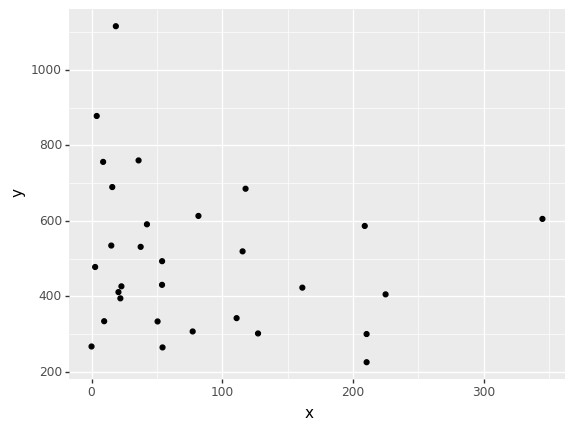

In [40]:
"""
Spearman Correlation

Non-parametric
Rank-based
Robust to outliers
Monotonic relationship (not based on linearity but on the increasing trend)
"""

data2 = pd.DataFrame({'x': dist1, 'y': dist2})
print(stats.spearmanr(dist1, dist2))
print(stats.pearsonr(dist1, dist2))
plot = p9.ggplot(data2) + p9.aes(x='x', y='y') + p9.geom_point()
print(plot)
